**Import Necessary Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/AI_Final/Concrete_Data_Yeh.csv");

**Data Read**

In [ ]:
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
column_names = df.columns.tolist() #df.coloumn returns the pandas index object with coloumn dataframe.

print("Attributes (Columns) of the Dataset:") #printout or display the coloumn attributes
print(column_names)

Attributes (Columns) of the Dataset:
['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age', 'csMPa']


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
flyash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseaggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineaggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
csMPa,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


Missing Value

In [ ]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())




Missing values in the dataset:
cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64


Checking for duplicates in data and it can easily seen that there are 25 duplicated values.

In [ ]:
df.duplicated().sum()

25

Dropping all the duplicated values from the dataset.

In [ ]:
df.drop_duplicates(inplace=True)

Change in the number of rows as we drop duplication

In [ ]:
# Get the number of rows and columns in the DataFrame
num_rows = df.shape[0]
num_columns = df.shape[1]

# Print the total size of the DataFrame
print("Total Size of the Dataframe:")
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

Total Size of the Dataframe:
Number of Rows: 1005
Number of Columns: 9


In [ ]:
# Generate descriptive statistics of the "df" object
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


**Data Visualization**

Visualizing the Correlation between the numerical variables using pairplot visualization.

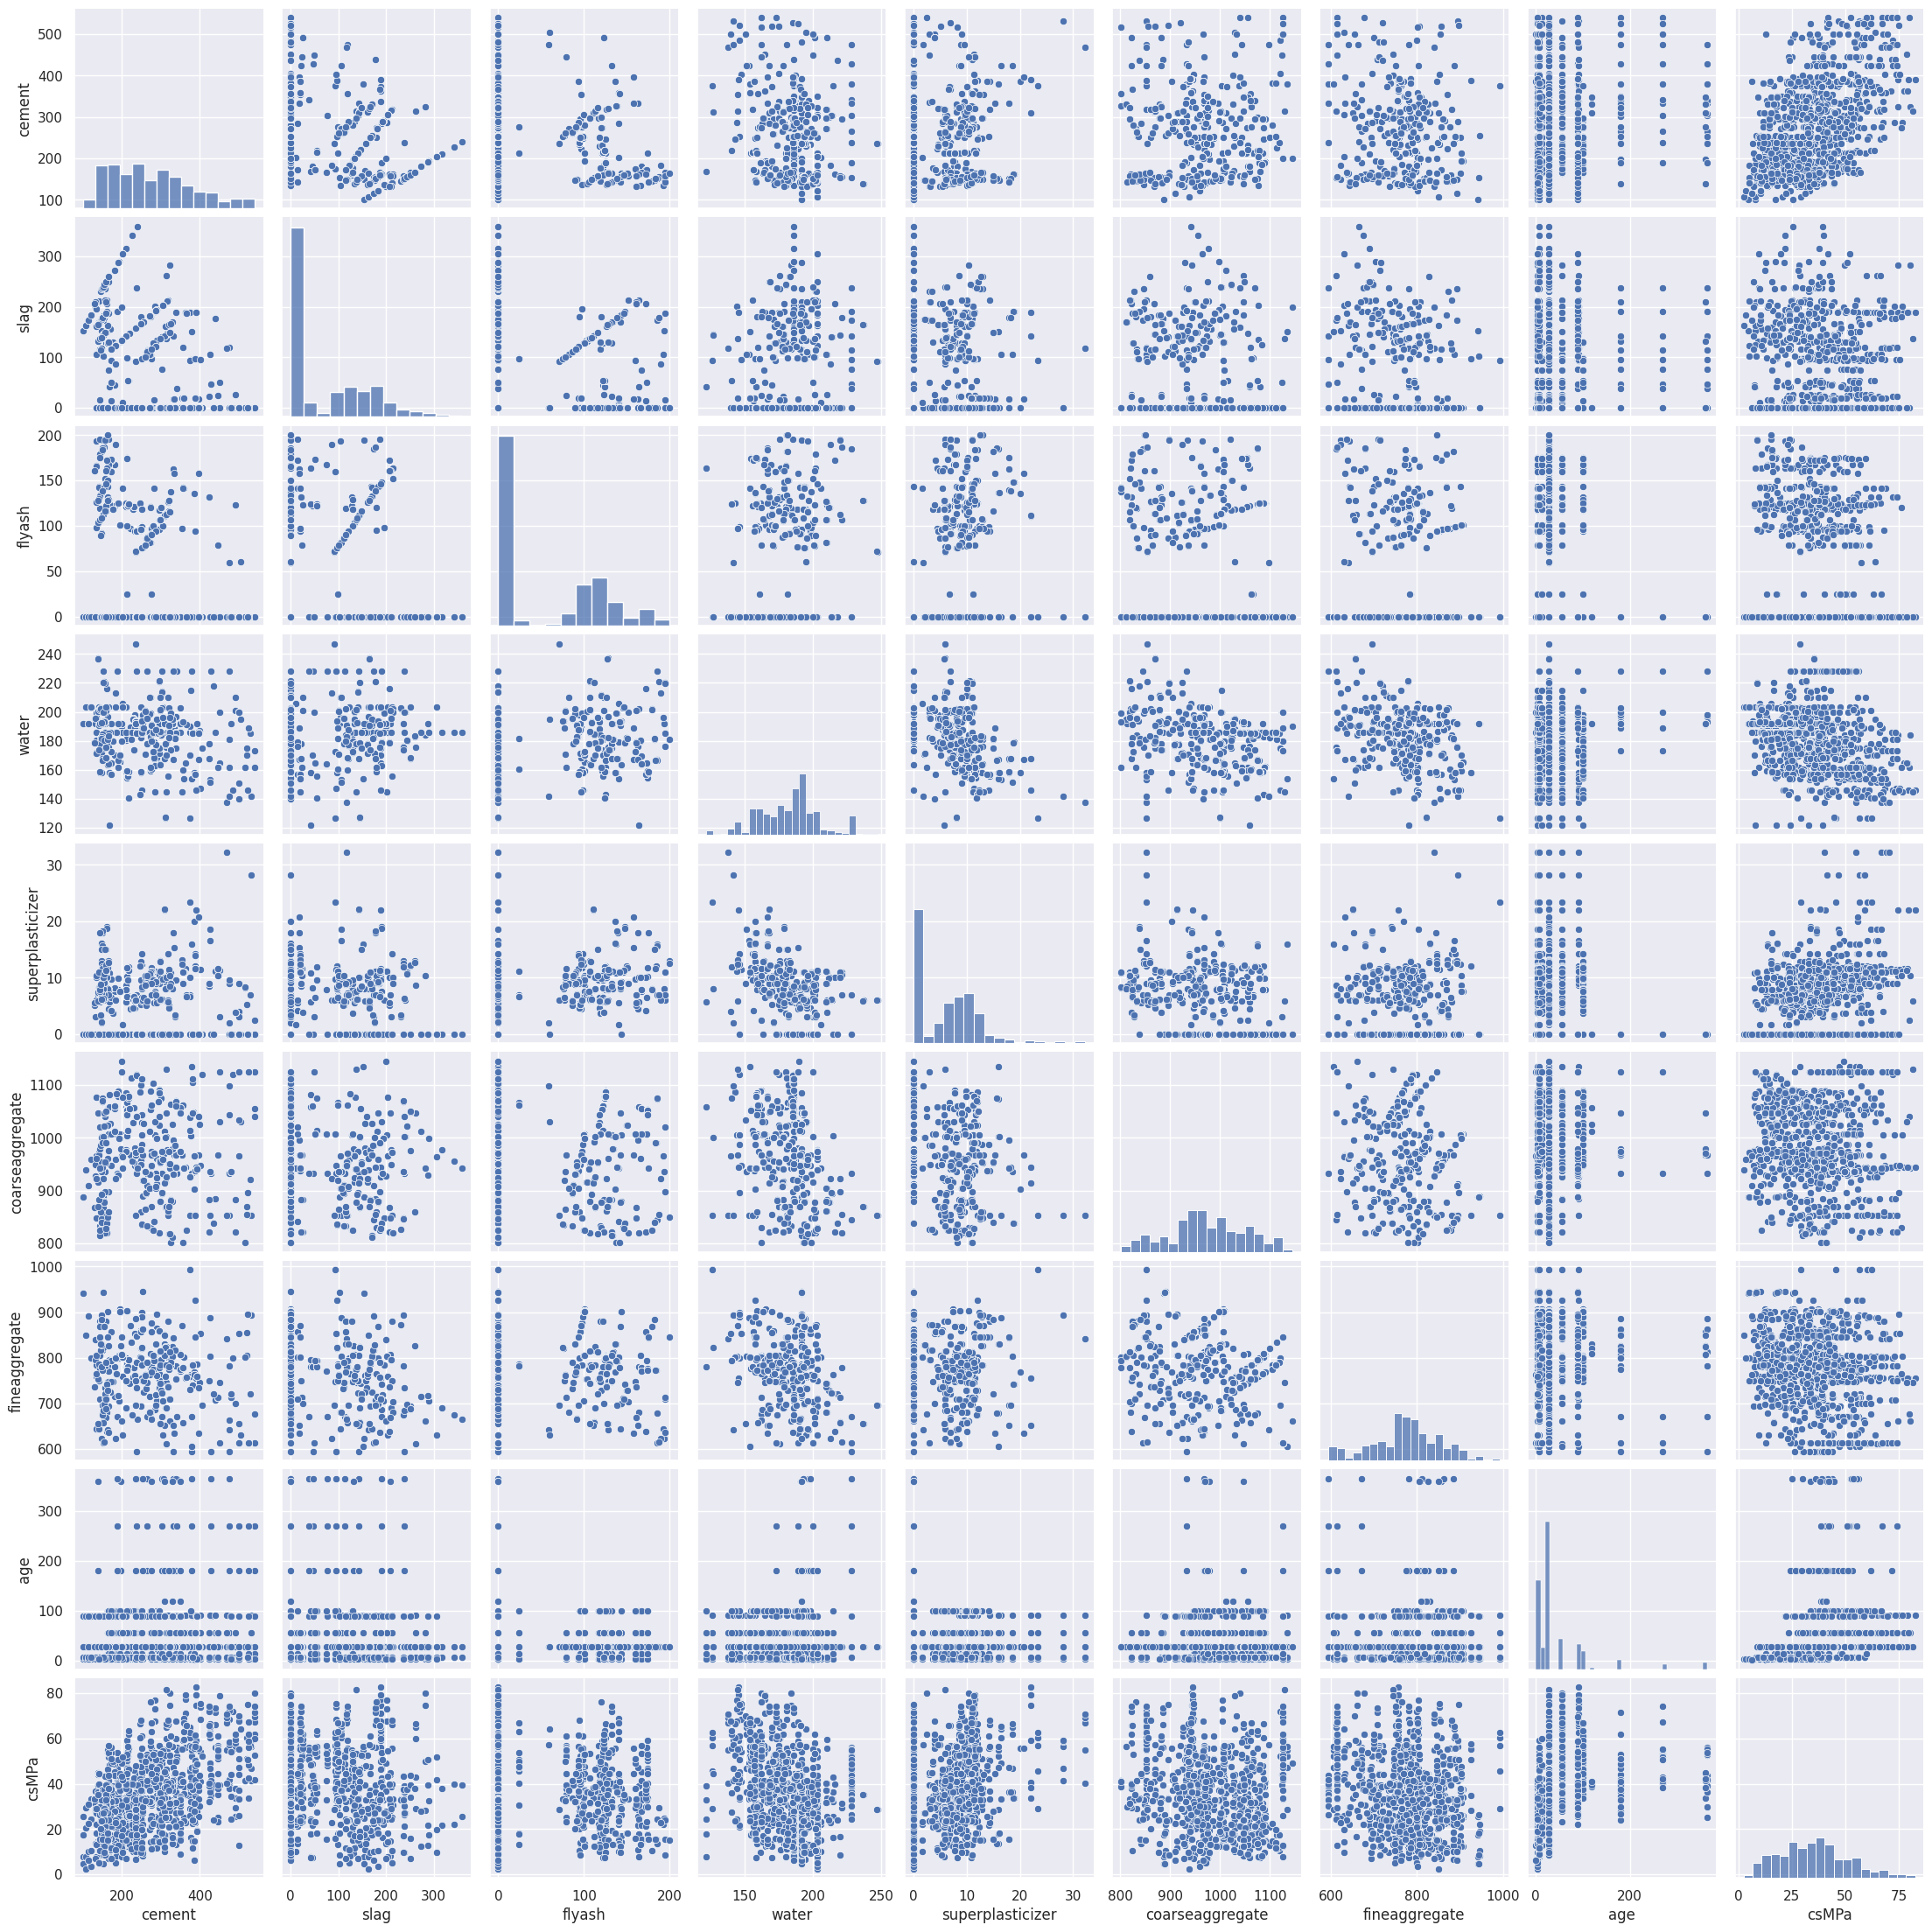

In [ ]:
sns.set_theme()# Set the default Seaborn theme
sns.pairplot(df)# Create a pair plot to visualize pairwise relationships in the DataFrame 'df'

Distribution of Each Variable

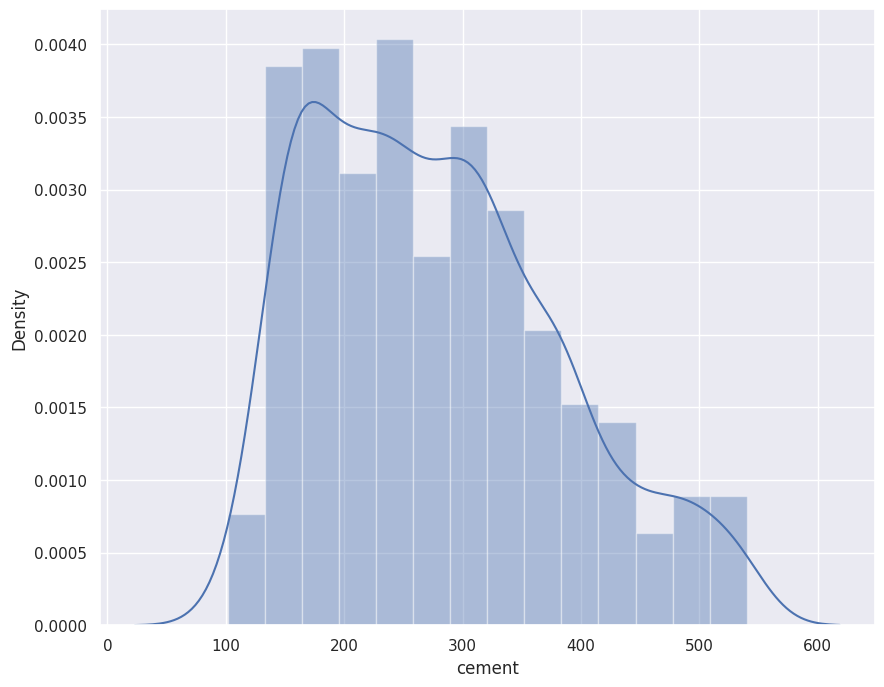

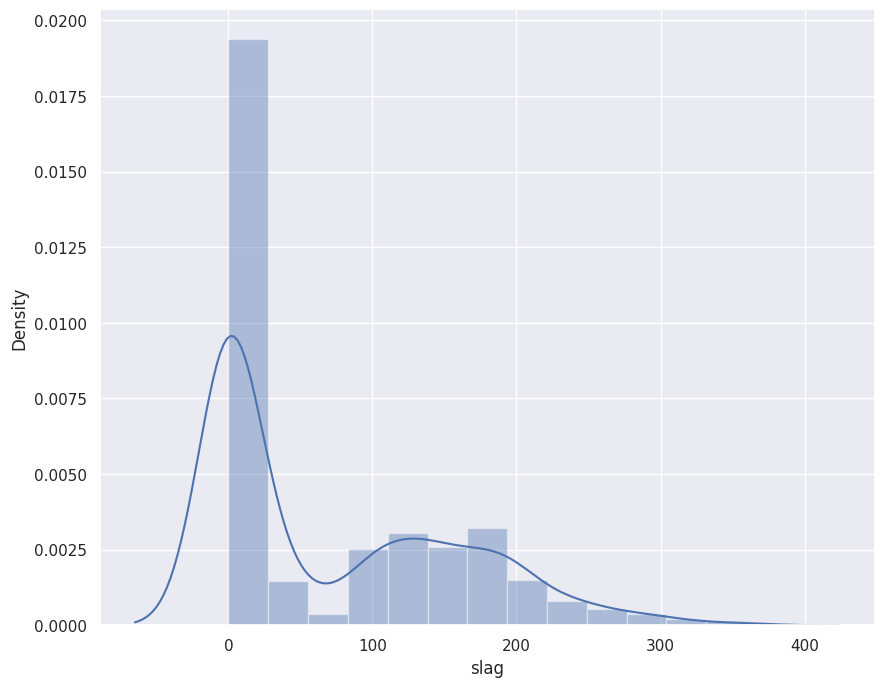

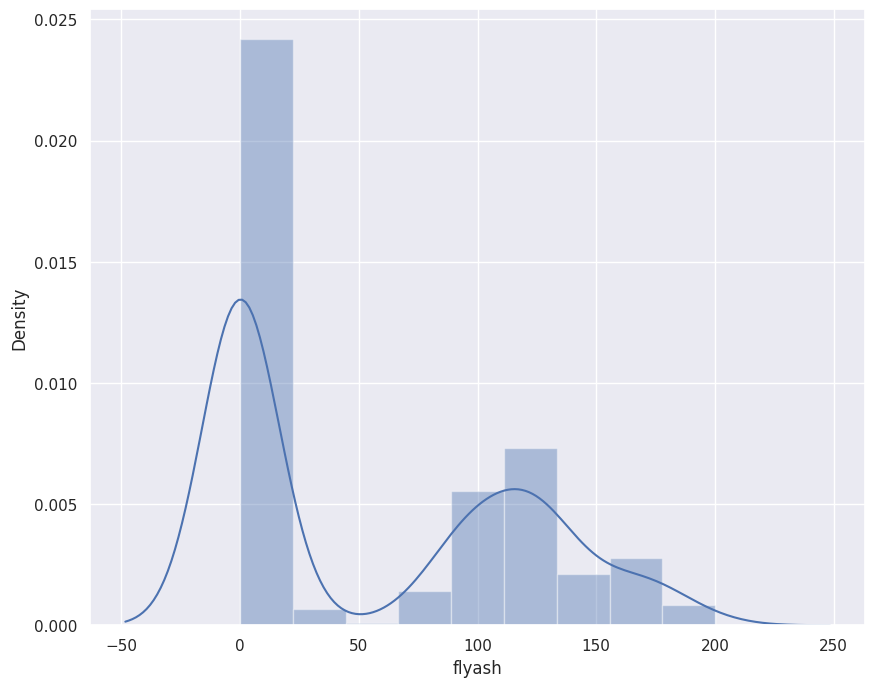

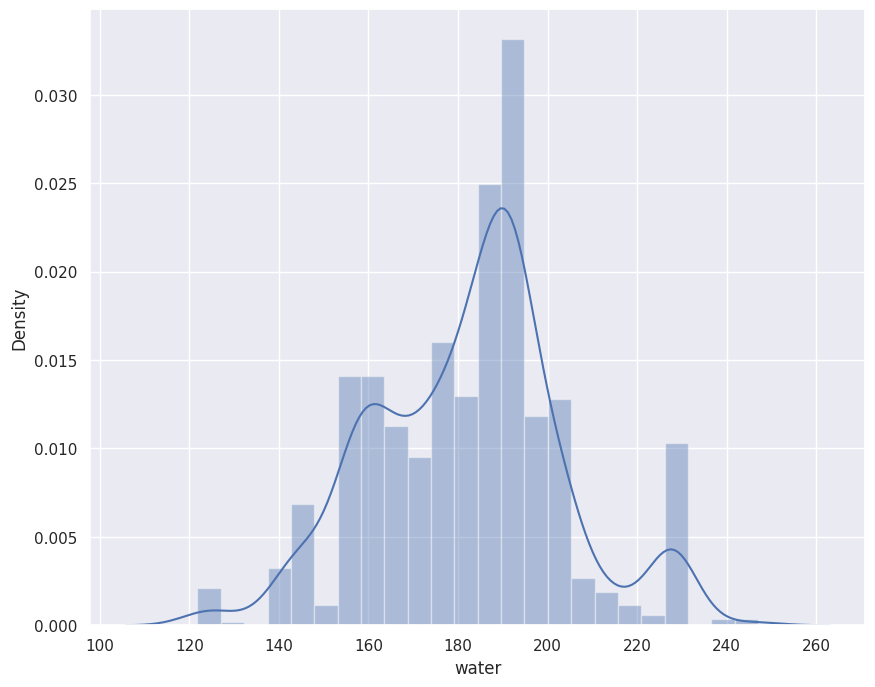

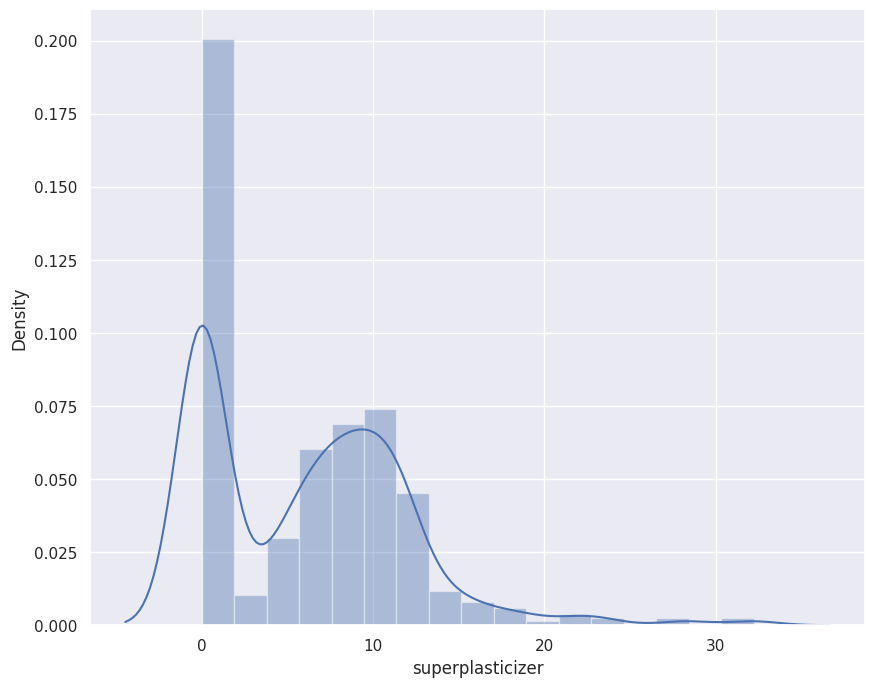

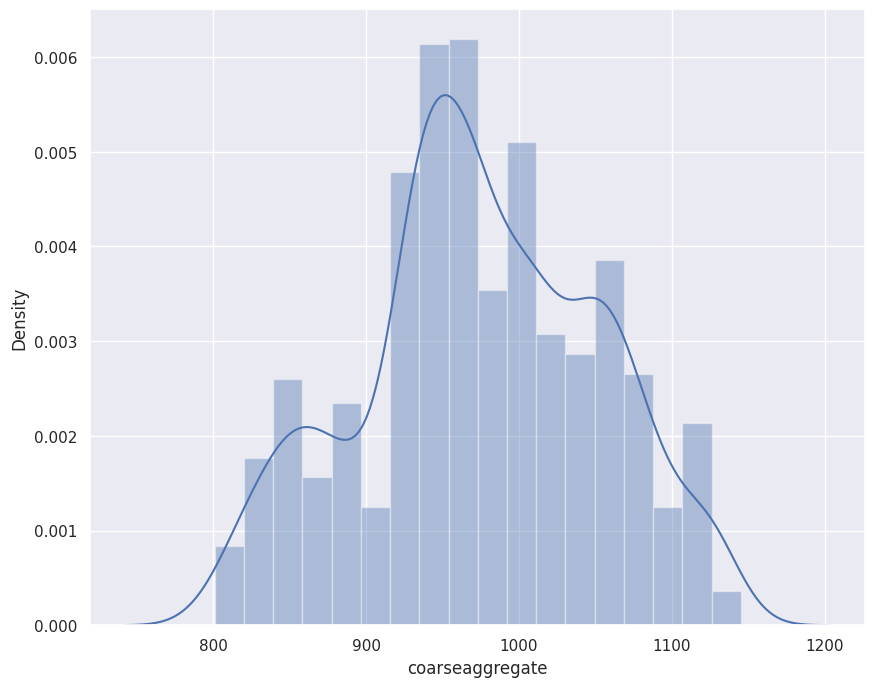

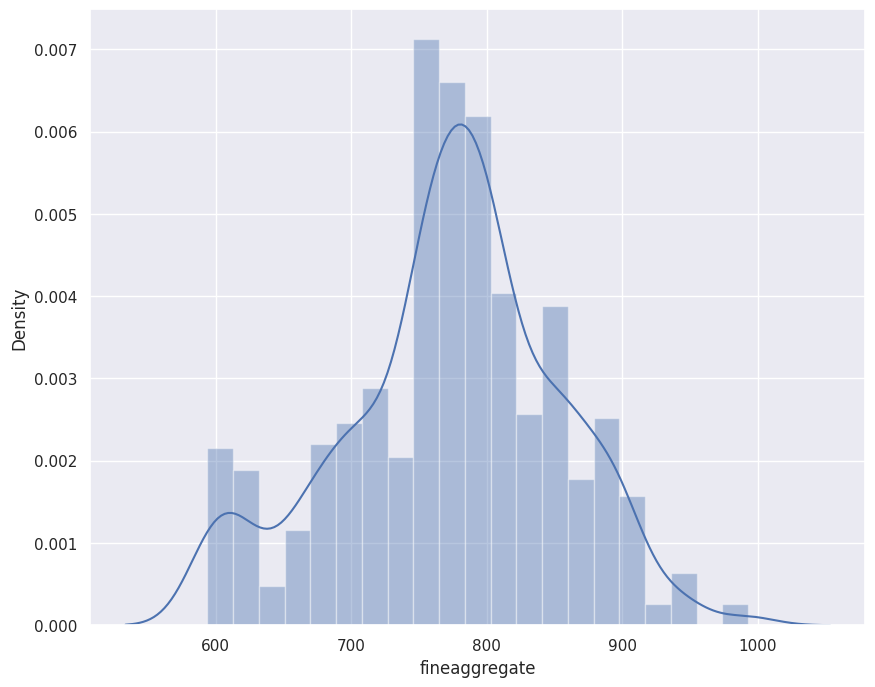

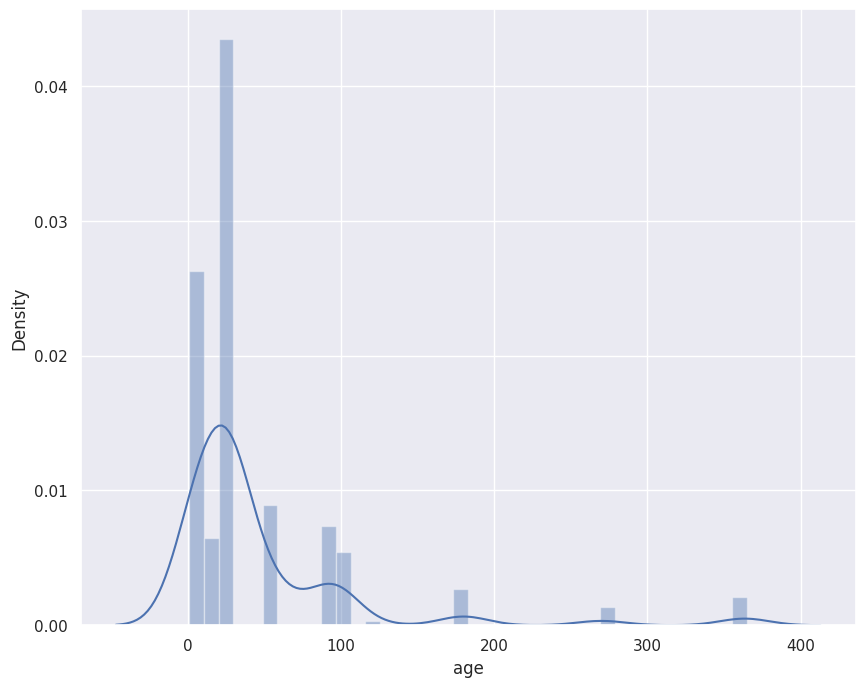

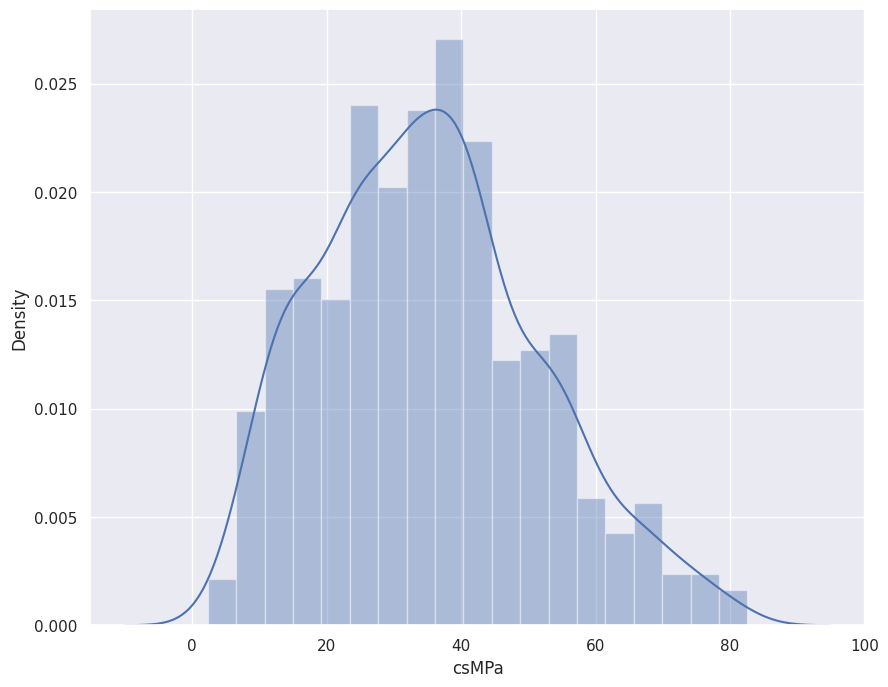

In [ ]:
# Visualize the distribution of each column in the DataFrame using Seaborn's distplot
for col in df.columns:
    plt.figure(figsize=(10,8))
    sns.distplot(df[col])
    plt.show()

Visualizing the linear correlations between variables using Heatmap visualization. The measure used for finding the linear correlation between each variable is Pearson Correlation Coefficient.

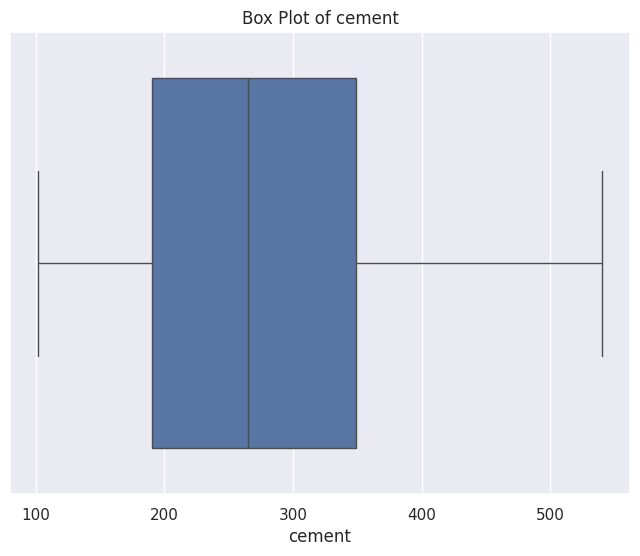

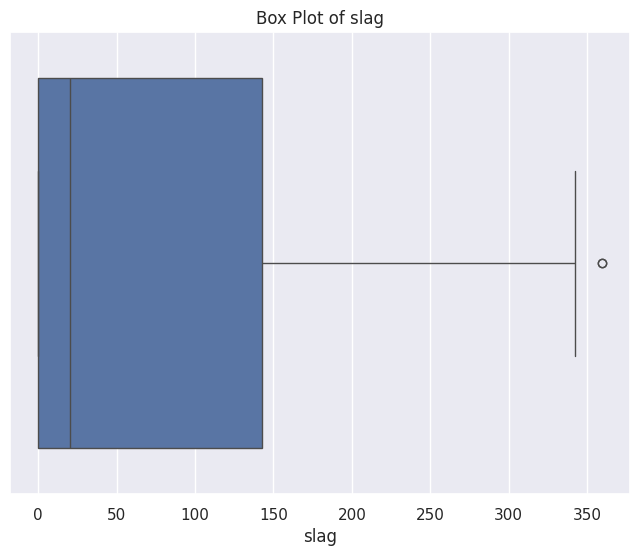

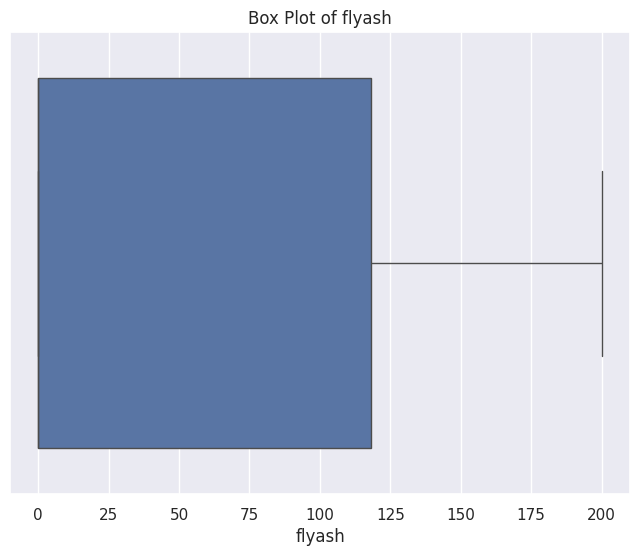

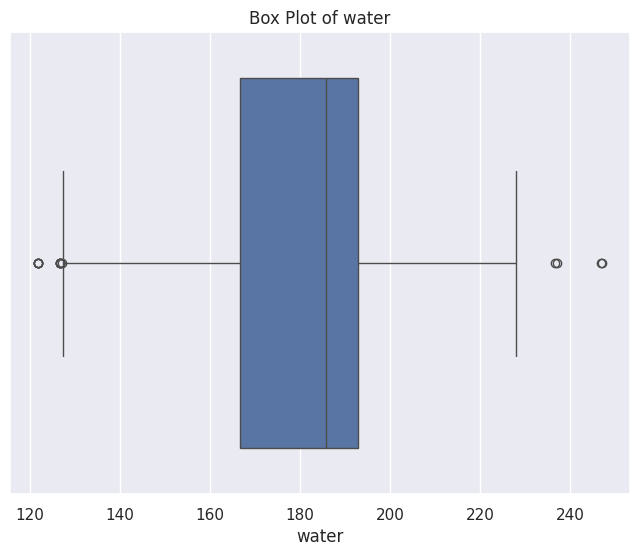

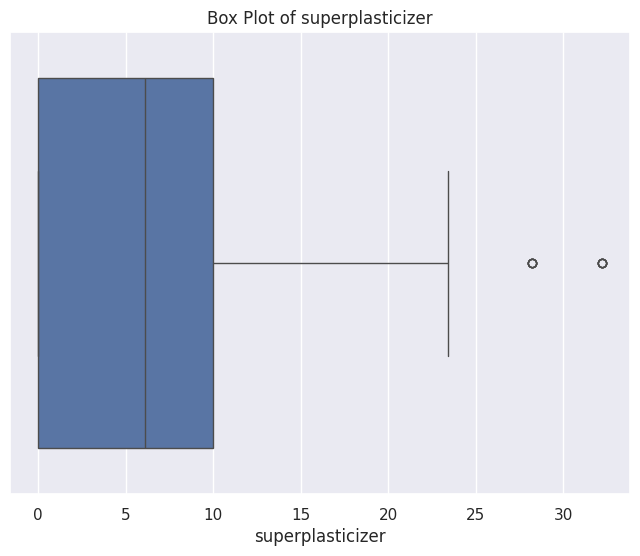

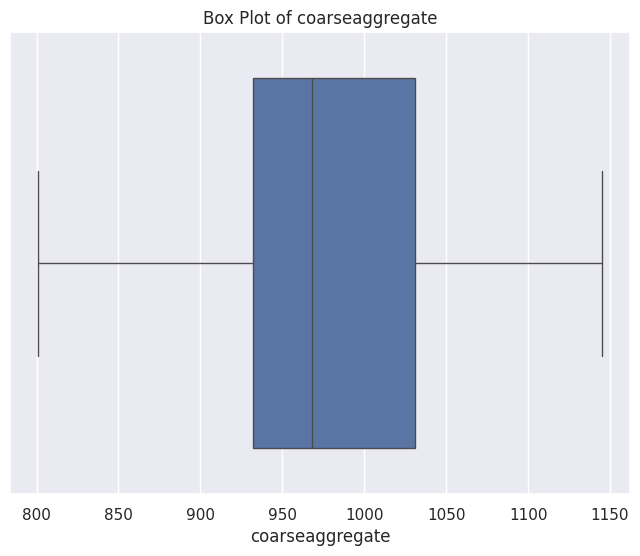

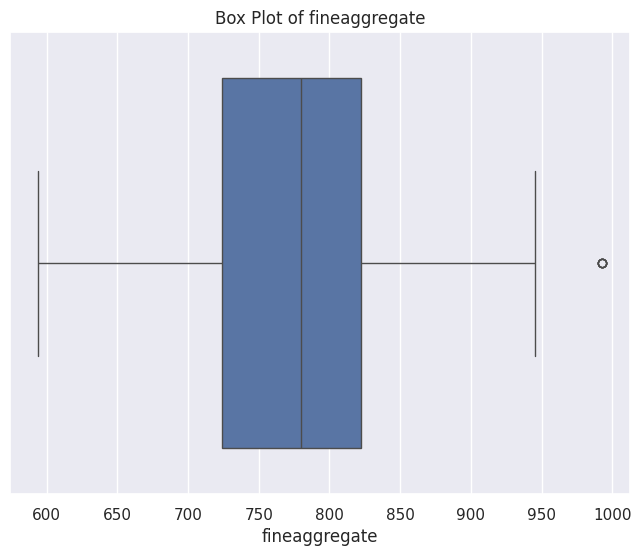

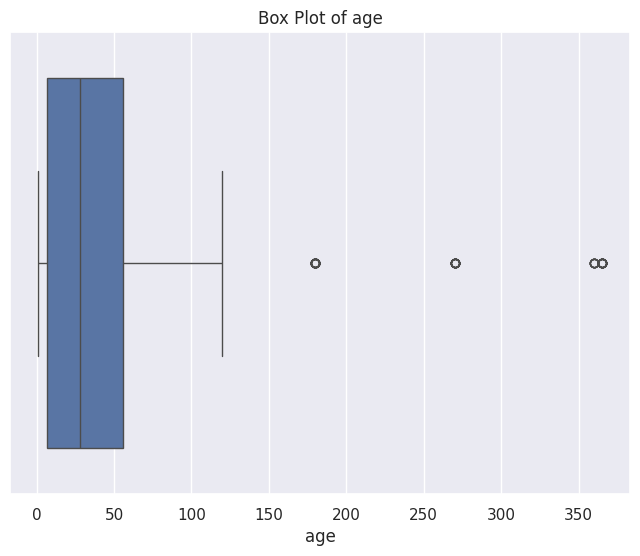

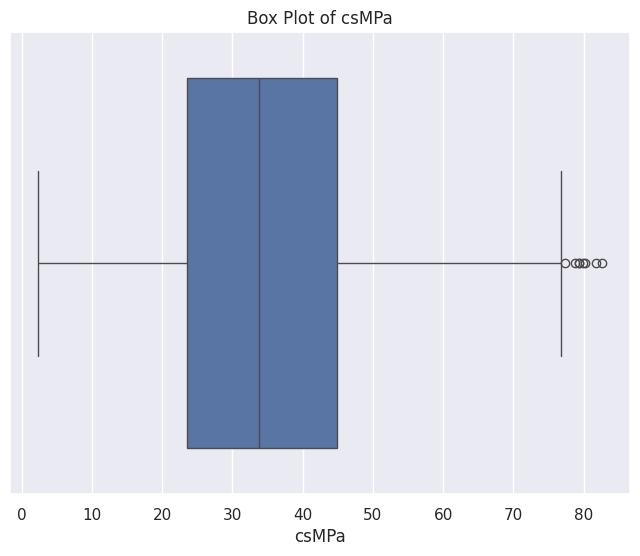

In [ ]:
# Box plot for each column
for col in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

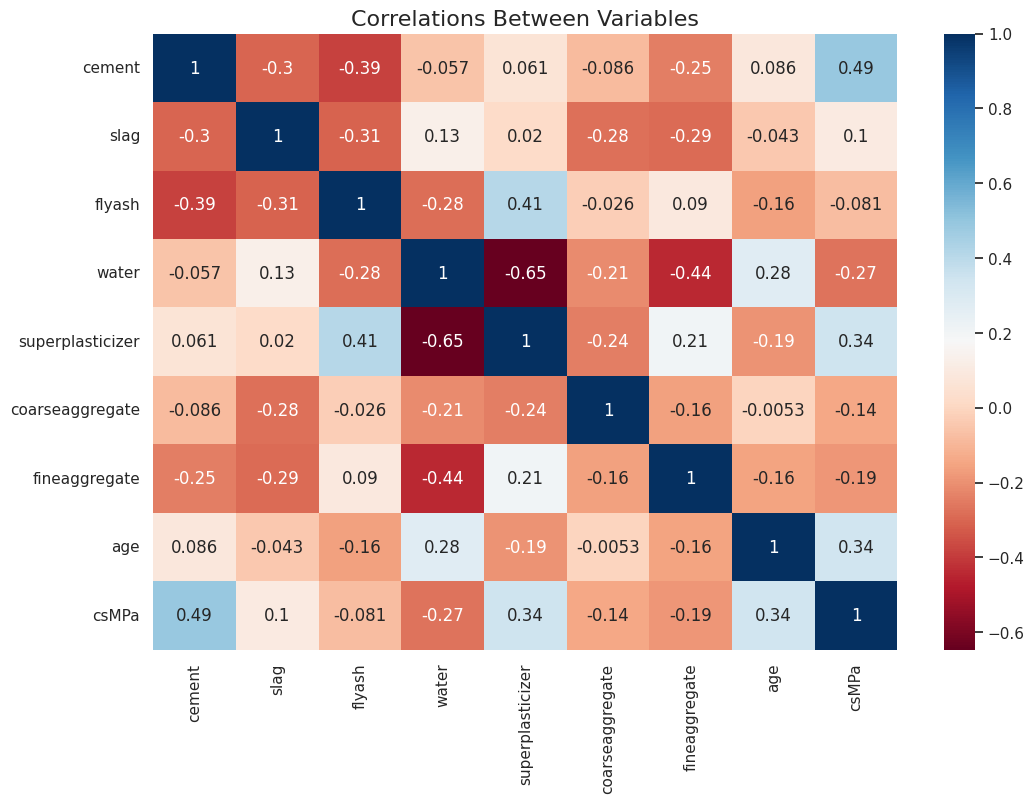

In [ ]:
# Visualize the correlation matrix using Seaborn's heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.title("Correlations Between Variables", size=16)
plt.show()

In [ ]:
def generate_data(samples=100, features=1):
    np.random.seed(42)
    X = 2 * np.random.rand(samples, features)  # Feature values
    y = 4 + 3 * X[:, 0] + np.random.randn(samples)  # Linear relation + noise
    return X, y

In [ ]:
def train_test_split(X, y, test_size=0.2):
    split_idx = int(len(X) * (1 - test_size))
    return X[:split_idx], X[split_idx:], y[:split_idx], y[split_idx:]

In [ ]:
def min_max_scale(X):
    return (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

In [ ]:
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        samples, features = X.shape
        self.weights = np.zeros(features)
        self.bias = 0

        for _ in range(self.epochs):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [ ]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

Mean Squared Error: 0.9757


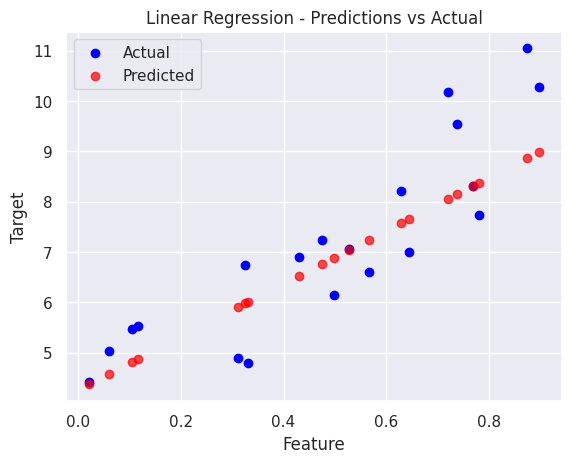

In [ ]:
X, y = generate_data()
X = min_max_scale(X)  # Scale features
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Train the model
model = LinearRegressionScratch(learning_rate=0.1, epochs=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Plot results
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.scatter(X_test, y_pred, color="red", label="Predicted", alpha=0.7)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.title("Linear Regression - Predictions vs Actual")
plt.show()

**Build Primary Model**

In [ ]:
X = df.drop("csMPa", axis=1)
y = df["csMPa"]

In [ ]:
# Assuming 'X' is your feature matrix (excluding the 'price' column) and 'y' is your target variable ('price')
# Use the train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('csMPa', axis=1), df['csMPa'], test_size=0.2, random_state=42)

In [ ]:
# Model 1: Linear Regression
model_lr = LinearRegression() #model linear regression
model_lr.fit(X_train, y_train) #distrubite the x and x train for linear regression

LinearRegression()

In [ ]:
model_rf = RandomForestRegressor(random_state=42) #random _stae42 is for having constant data of dataset
model_rf.fit(X_train, y_train) #train and test for model random forest regression

RandomForestRegressor(random_state=42)

In [ ]:
# Evaluate Linear Regression model
y_pred_lr = model_lr.predict(X_test) #line uses the trained linear regression model (model_lr) to make predictions on the test data (X_test) and stored in y_pred_lr.
mse_lr = mean_squared_error(y_test, y_pred_lr) #MSE is calculated for the linear regression model
print(f'Mean Squared Error (Linear Regression): {mse_lr}') #print mean square for linear regression

# Evaluate Random Forest Regression model
y_pred_rf = model_rf.predict(X_test)  #line uses the trained Random forest regression model (model_lr) to make predictions on the test data (X_test) and stored in y_pred_lr
mse_rf = mean_squared_error(y_test, y_pred_rf) #calculate the mean square
print(f'Mean Squared Error (Random Forest Regression): {mse_rf}') #print mean square for random forest regression model


Mean Squared Error (Linear Regression): 125.2456480505019
Mean Squared Error (Random Forest Regression): 27.61734999419001


The output values indicate the calculated MSE for each model. In this case, the Linear Regression model has a higher MSE (125.25) compared to the Random Forest Regression model (27.62). Lower MSE values suggest better predictive performance, so the Random Forest Regression model appears to perform better in this evaluation.

In [ ]:
# Compare and choose the best model based on the metrics
if mse_lr < mse_rf and r2_lr > r2_rf:#if case to check the best model
    print("Linear Regression is the better-performing model.")
else:
    print("Random Forest is the better-performing model.") #print if case doesnot statifiys


Random Forest is the better-performing model.


**Hyper-parameter Optimization with Cross-Validation**

In [ ]:
# Defining  the parameter grid for Linear Regression
param_grid_lr = {
    'fit_intercept': [True, False]
}

# Creating  Linear Regression model
model_lr = LinearRegression()

# Performing  GridSearchCV
grid_search_lr = GridSearchCV(model_lr, param_grid=param_grid_lr, cv=5)
grid_search_lr.fit(X_train, y_train)

# Print the best hyperparameters for Linear Regression
best_params_lr = grid_search_lr.best_params_ #to find best hyperparameter
print("Best Hyperparameters for Linear Regression:", best_params_lr) #print best hyperparmeters


Best Hyperparameters for Linear Regression: {'fit_intercept': False}


In [ ]:
# define smaller parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Creating  Random Forest model
model_rf = RandomForestRegressor(random_state=42)

# Performing  GridSearchCV with verbose and limited combinations
grid_search_rf = GridSearchCV(model_rf, param_grid=param_grid_rf, cv=5, verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Print the detailed results
print("Grid Search Results:")
print(grid_search_rf.cv_results_)

# Print the best hyperparameters for Random Forest
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Grid Search Results:
{'mean_fit_time': array([0.31964817, 0.6508543 , 0.28277035, 0.60627785, 0.41351409,
       1.01074018, 0.47209005, 0.55457263, 0.29249649, 0.5829402 ,
       0.25939369, 0.52735505, 0.26000428, 0.51877294, 0.2502255 ,
       0.4858716 ]), 'std_fit_time': array([0.02090634, 0.01243719, 0.0083336 , 0.08819587, 0.11545196,
       0.01886211, 0.04772494, 0.03237511, 0.00863801, 0.01133384,
       0.01013149, 0.00883476, 0.01400663, 0.01185587, 0.00395824,
       0.04128034]), 'mean_score_time': array([0.01326666, 0.02316976, 0.01426601, 0.02488222, 0.01792374,
       0.03520269, 0.02118926, 0.02142386, 0.01378765, 0.02222948,
       0.0117949 , 0.02012715, 0.01230941, 0.02029109, 0.01222939,
       0.01920028]), 'std_score_time': array([0.00082024, 0.00083775, 0.00218072, 0.0075084 , 0.00398967,
       0.00983174, 0.00742716, 0.00086299, 0.00117409, 0.00204446,
       0.00070178, 0.00056043, 0.00034371, 0.00

**Feature Selection**

For feature selection, a widely used technique is Recursive Feature Elimination (RFE). This method iteratively eliminates the least significant features from the dataset and builds the model until a specified number of features is achieved. The process involves ranking features based on their importance and removing the least significant ones in each iteration. RFE helps streamline the feature set and enhance model performance by retaining the most relevant features for the given task.

In [ ]:
# Assuming model_lr is the best Linear Regression model from previous steps
selected_model = model_lr

# Assuming X_train is the training data with all features
selector = RFE(selected_model, n_features_to_select=5)  # Choose the number of features you want to keep
selector = selector.fit(X_train, y_train) #selecting from x-train and y-train

# Get the selected features
selected_features = X_train.columns[selector.support_] #extracts the names of the selected features from the training data (X_train).
X_train_selected = selector.transform(X_train) # applies the transformation to the training data (X_train) using the feature selector
X_test_selected = selector.transform(X_test) #previous line, this one transforms the test data (X_test)


**Final Model**

In [ ]:
# Assuming model_lr is the best Linear Regression model from previous steps
final_model_lr = LinearRegression(**best_params_lr) #line creates an instance of the Linear Regression model (LinearRegression) using the best hyperparameters
final_model_lr.fit(X_train_selected, y_train)

# Assuming model_rf is the best Random Forest model from previous steps
final_model_rf = RandomForestRegressor(**best_params_rf, random_state=42) #This line fits the random forest regression model (final_model_rf) on the training data (X_train_selected,
final_model_rf.fit(X_train_selected, y_train)


RandomForestRegressor(random_state=42)

**Conclusion**

Assessment of Model Performance (Section 3.1.3):

Linear Regression:

Mean Squared Error: 125.24

Random Forest Regression:

Mean Squared Error: 27.61

Influence of Methods (Cross Validation and Feature Selection):

The integration of cross-validation contributed to the creation of a robust model, reducing the risk of overfitting. Feature selection played a vital role in improving the model's analysis and reducing training duration.

Recognizing the significance of hyperparameter tuning for optimizing model performance. Choosing the right features for a model is important for making it work better. In the future, researchers might look into using more advanced models and adding useful features to make the models even better.